## 3차 과제 - 당뇨병을 예측해보자
- 주제: 데이터 분석 실습(머신러닝)
- 데이터: 피마 인디언 당뇨병 데이터
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- 사용 라이브러리: numpy, pandas, matplotlib, sklearn


### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, sklearn(train_test_split, accurarcy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, StandardScaler, LogisticRegression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

1.2 데이터를 불러오고 타겟 변수('Outcome')에 속한 값들의 비율과(value_counts 활용) 전체 데이터 앞 7개 값을 확인하세요.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAT/DAT 개인과제/diabetes.csv')
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


1.3 데이터의 feature 타입과 Null 개수를 확인하세요.

In [8]:
# BM!와 DiabetesPedigreeFunction(float)을 제외한 나머지는 int였다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# 결측치는 없었다
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

1.4 예측을 위해 데이터를 feature 데이터 셋과 target 데이터 셋으로 나누세요.

In [10]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

1.5 X와 y로 나눈 데이터 셋을 다시 train, test로 나누세요(test_size = 0.3, random_state=123, stratify=y).

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123, stratify=y)

1.6 test size는 어느정도로 해야 좋은지 그리고 왜 그래야 하는지 작성하세요.

일반적으로 분할 비율은 학습용으로 80%, 테스트용으로 20%이다. 즉, 데이터의 80%가 모델 훈련에 사용되고 나머지 20%는 보이지 않는 데이터에 대한 성능을 평가하는 데 사용된다.

테스트 세트의 크기는 모델의 일반화 성능에 대한 신뢰할 수 있는 추정치를 제공할 만큼 충분히 커야 한다는 점에 유의하는 것이 중요하다.

1.7 startify 값을 설정하는 이유와 언제 주로 사용되는지 서술하세요.

stratify=y를 사용하면 테스트 세트는 원본 데이터와 유사한 클래스 분포를 갖게 되며, 이는 특히 불균형 데이터 세트를 처리할 때 더욱 신뢰할 수 있는 평가 결과를 얻는 데 도움이 될 수 있다.

### 2. 예측 및 분석

2.1 성능 평가에 사용될 함수를 만들어보겠습니다. accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score로 구성되어 있으며 이를 한번에 출력할 수 있도록 합니다.

In [19]:
def clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬,\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

2. 위에서 사용한 성능지표인 Confusion Matrix에 대해 설명하세요.

confusion matrix는 분류 모델의 성능을 평가하는 데 자주 사용되는 테이블이다. 다양한 클래스에 걸쳐 인스턴스를 올바르게 분류하고 잘못 분류하는 측면에서 모델이 얼마나 잘 수행되고 있는지에 대한 포괄적인 보기를 제공한다.

* TP(True Positive): 모델이 양성 클래스의 인스턴스를 올바르게 예측했다.
* FN(False Negative): 모델이 부정적인 사례를 긍정적인 사례로 잘못 예측했다.
* FP(False Positive): 모델이 양성 인스턴스를 음성으로 잘못 예측했다.
* TN(True Negative): 모델이 네거티브 클래스의 인스턴스를 올바르게 예측했다.

* 정확도: (TP + TN) / (TP + TN + FP + FN)
* 정밀도: TP / (TP + FP)
* 재현율(민감도 또는 진양성률): TP / (TP + FN)
* 특이도(진음성율): TN/(TN + FP)
F* 1 점수: 2 * (정밀도 * 재현율) / (정밀도 + 재현율)

이러한 측정항목은 긍정적인 사례를 올바르게 식별하는 기능(정밀도), 모든 긍정적인 사례를 캡처하는 기능(재현율), 정밀도와 재현율 간의 균형(F1 점수) 등 모델 성능에 대한 다양한 관점을 제공합니다.

2.2 로지스틱 회귀로 예측 후 위에서 만든 clf_eval() 함수를 통해 잘 예측했는지 확인하세요(solver='linear'로 설정, 예측 변수명은 pred, pred_proba).

In [29]:
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
pred_proba = lr.predict_proba(x_test)[:,1]
clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[134  16]
 [ 39  42]]
정확도: 0.7619, 정밀도: 0.7241, 재현율: 0.518519, F1: 0.6043, AUC:0.8436


2.3 LogisticRegression에서 solver 파라미터의 역할과 어떤 것들이 있고 각각은 무엇을 의미하는지 작성하세요.

Solver는 LogisticRegression 모델에서 사용하는 하이퍼 파리미터 중 하나로, 비용함수의 최솟값을 어떠한 방법으로 찾을 것인지를 지정하는 역할을 한다.

종류에는 newton-cg, lbfgs, liblinear, sag, saga로 총 5가지가 있다. 이중에 newton-cg, lbfgs은 뉴튼 랩슨 방법을 활용하고, 나머지 3개는 경사하강법을 활용한다.

2.4 pred와 pred_proba는 각각 어떤 차이가 있는지 작성하세요.

pred에는 실제 예측된 클래스 레이블(0 또는 1과 같은 이진 값)이 포함된다.


pred_proba에는 각 클래스에 대한 예측 확률(0~1 범위의 확률)이 포함되어 있으며 모델의 신뢰도를 이해해야 하거나 클래스 할당에 대한 결정 임계값을 조정하려는 경우에 자주 사용한다.

실제로 모델의 정확성, 정밀도, 재현율 등을 평가하는 데 'pred'를 사용할 수 있는 반면, 'pred_proba'는 ROC 곡선 생성, AUC 점수 계산 또는 애플리케이션 요구 사항에 따라 맞춤 결정 임계값 설정에 유용할 수 있다.

2.5 전체 데이터 중 약 65%가 Negative이므로 재현율 성능에 조첨을 맞추겠습니다. 정밀도 재현율 curve를 보고 임계값 별 정밀도 재현율 값의 변화를 확인하기 위해 이를 위한 함수를 작성하겠습니다.

In [30]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    #threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    #X축, y축 label과 legend, grid 설정
    ### 직접 작성(xlabel - 'Threshold value', ylabel = 'Precision and Recall value'), legend, grid는 default값으로
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

In [28]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

2.6 작성한 함수를 바탕으로 임계값 별 정밀도와 재현율 값 변화를 확인하세요.

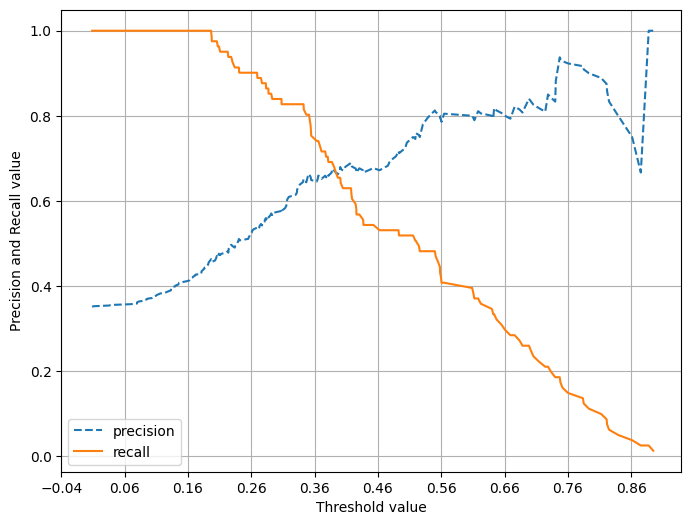

In [31]:
pred_proba_c1 = lr.predict_proba(x_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

2.7 그래프를 통해 확인했을 때 Threshold를 0.38정도로 설정했을 때 recall과 precision이 어느정도 균형이 맞음을 알 수 있습니다. 그러나 두 지표 모두 0.7 이하로 낮은 값이기에 다시 확인하도록 하겠습니다. 먼저 describe() 함수를 통해 개별 feature에 대한 분포도를 확인하세요.

In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.8 위에서 확인해봤을 때 min 값이 0으로 되어 있는 feature가 다수 존재합니다. Glucose(포도당 수치), BMI 지수가 0인 것은 말이 안 되므로 이들을 평균값으로 대체하세요.

In [33]:
### Glucose, BloodPressure, SkinThickness, Insulin, BMI에 대해 평균값으로 대체
for feature in ['Glucose', 'BloodPressure','SkinThickness','Insulin', 'BMI']:
    df[feature] = df[feature].replace(0, df[feature].mean())

2.9 이후 대체한 feature들에 대해 feature scaling을 진행하겠습니다. 모두 numeric feature이므로 X에 대해 StandardScaler를 일괄 적용하세요.

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#x_test_scaled = scaler.transform(x_test)

2.10 feature scaling은 왜 사용하고 어떤 것들이 있는지 작성하세요.

특성 스케일링은 데이터 세트의 특성이 일관된 스케일을 갖도록 보장하는 데 사용된다. 이를 통해 특히 특성 스케일과 거리에 민감한 기계 학습 알고리즘의 성능, 안정성 및 수렴을 향상할 수 있다.

* MinMaxScaler : 데이터가 0과 1 사이에 위치하도록 스케일링
* MaxAbsScaler : 데이터가 -1과 1 사이에 위치하도록 스케일링
* StandardScaler : 데이터의 평균 = 0, 분산 = 1이 되도록 스케일링
* RobustScaler : 데이터의 중앙값 = 0, IQE = 1이 되도록 스케일링

2.11 다시 에측하기에 앞서 위에서 scaling을 통해 변경된 X_scaled를 활용해 다시 train_test_split을 진행하세요(함수 파라미터 동일).

In [42]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123, stratify=y)

2.12 로지스틱 회귀로 앞서 진행한 것과 동일하게 진행하세요.

In [44]:
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train_scaled, y_train)
pred = lr.predict(x_test_scaled)
pred_proba = lr.predict_proba(x_test_scaled)[:,1]
clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[132  18]
 [ 38  43]]
정확도: 0.7576, 정밀도: 0.7049, 재현율: 0.530864, F1: 0.6056, AUC:0.8584


### 3. 자유 분석
성능을 높일 수 있는 방법들을 활용해 예측을 진행하세요.

In [45]:
import seaborn as sns

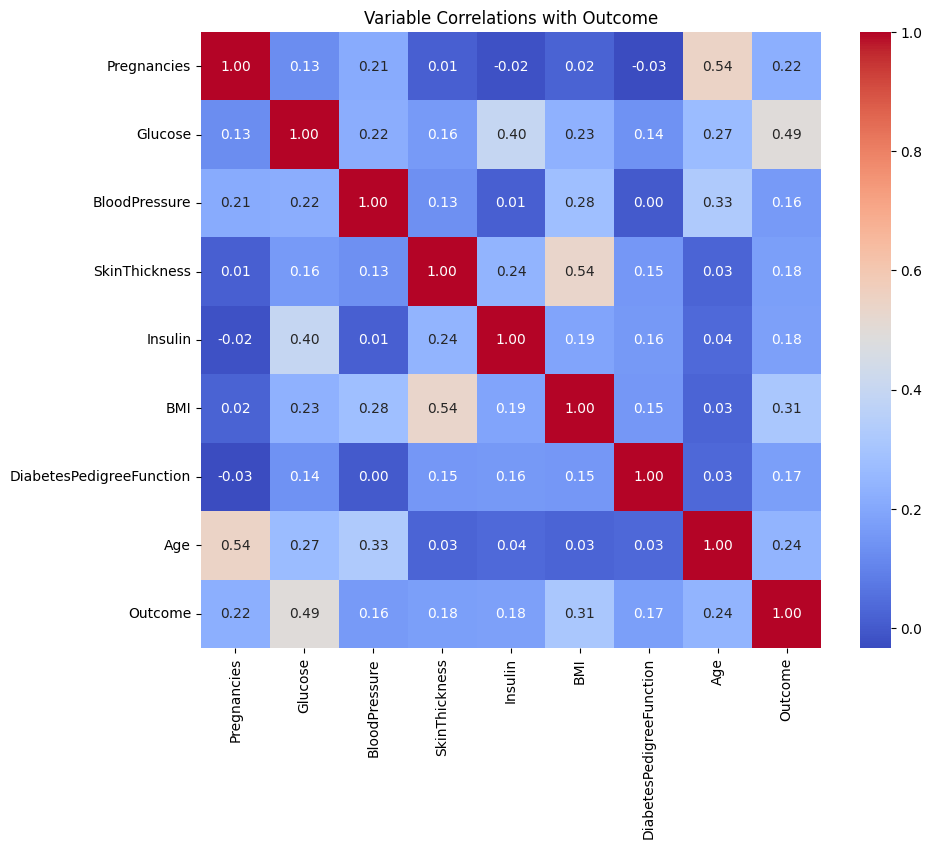

In [46]:
# 상관관계 계산
correlation_matrix = df.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Variable Correlations with Outcome')
plt.show()

Outcome과 독립변수들간의 상관관계를 시각화한 결과 모두 양의 상관관계를 보이고 있는 것을 알 수 있다.

그 중 Glucose(포도당)과 BMI(비만지수)가 높은 상관관계를 보였다.

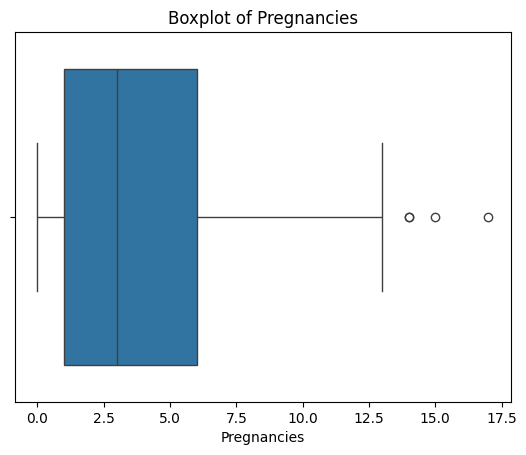

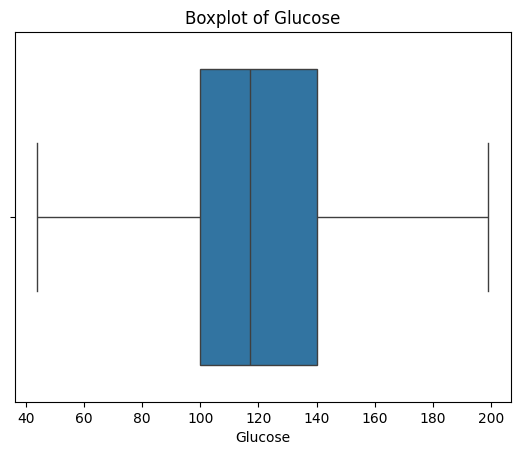

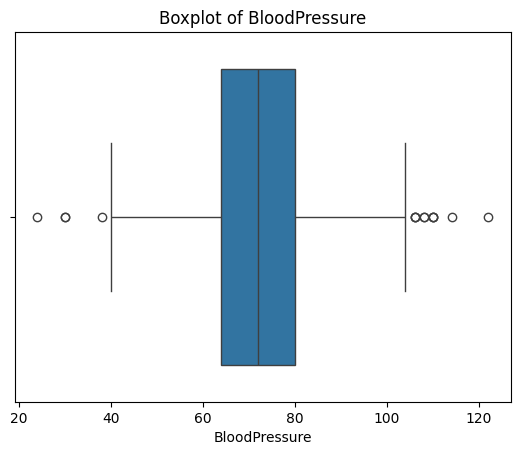

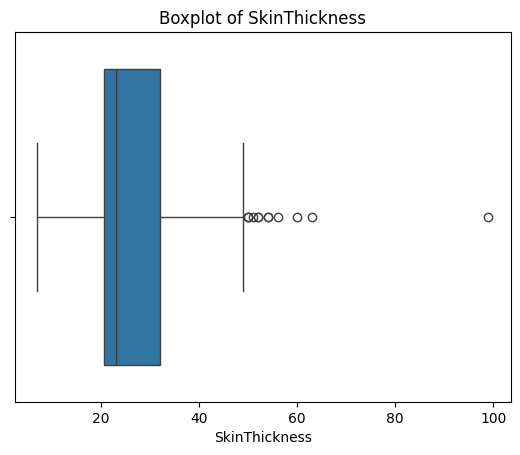

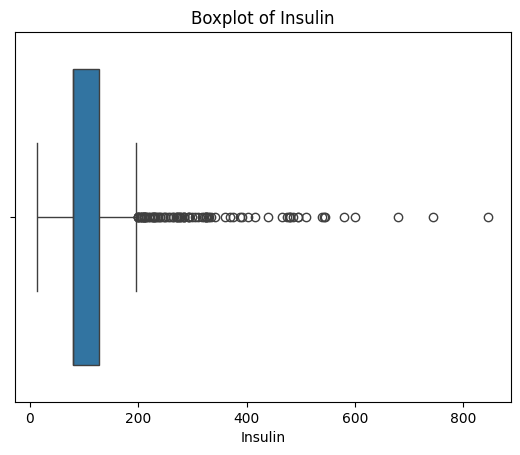

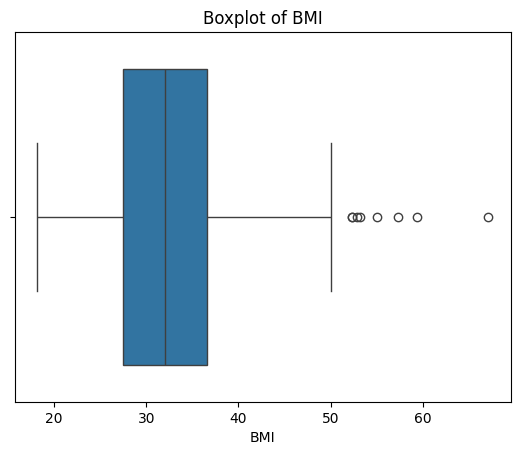

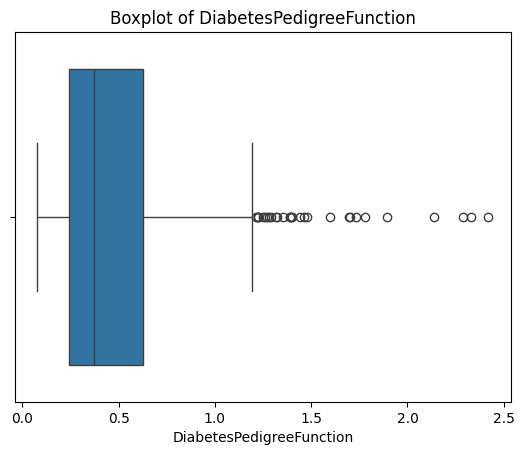

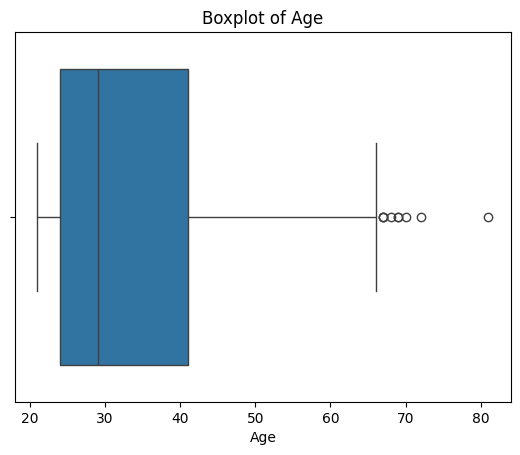

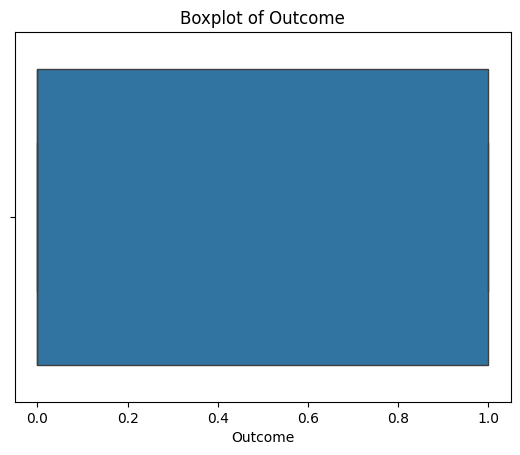

In [48]:
# 반복문을 활용해서 각 독립변수 boxplot 생성

for feature in df.columns:
    sns.boxplot(x=feature, data=df)
    plt.title(f'Boxplot of {feature}')
    plt.show()

세계 보건 기구에 따르면 BMI가 30 이상인 경우를 비만으로 판정한다.

주어진 데이터셋의 경우에는 BMI 중간 값이 30을 넘겼기 때문에 비만인 비율이 높은 것을 알 수 있다.

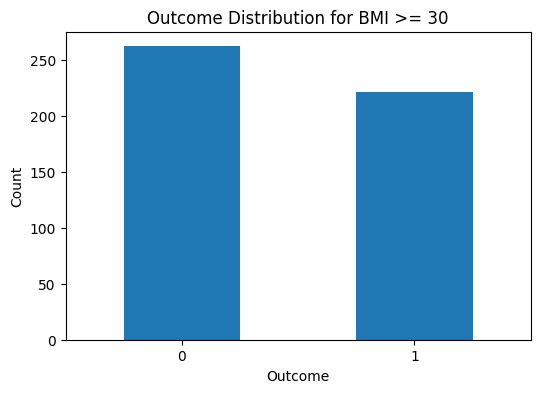

In [50]:
# BMI 값이 30 이상인 행만 추출
df_bmi_over_30 = df[df['BMI'] >= 30]

# Outcome 분포를 막대 그래프로 시각화 (countplot 대신 사용)
outcome_counts = df_bmi_over_30['Outcome'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
outcome_counts.plot(kind='bar')
plt.title('Outcome Distribution for BMI >= 30')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

BMI 지수가 30보다 높은 행들만 따로 추출해 당뇨병 유무를 확인해봤다. 확인한 결과 0(당뇨병o)인 사람이 더 많았다.

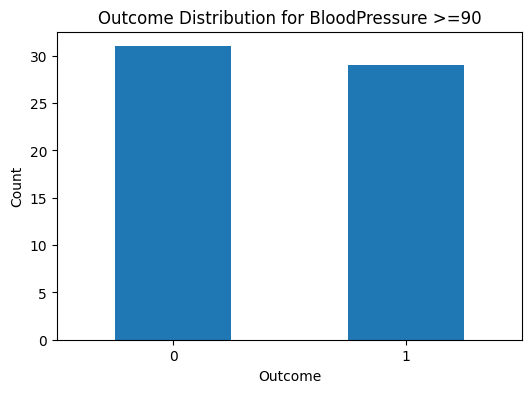

In [52]:
# BloodPressure가 90 이상인 행만 추출
df_high_blood_pressure = df[df['BloodPressure'] >= 90]

# Outcome 분포를 막대 그래프로 시각화 (countplot 대신 사용)
outcome_counts = df_high_blood_pressure['Outcome'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
outcome_counts.plot(kind='bar')
plt.title('Outcome Distribution for BloodPressure >=90')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

혈압 지수가 90이상인 행들만 따로 추출해서 당뇨병 유무를 예측해보았다. 확인한 결과 아주 미세하지만 당뇨병을 가진 사람들이 더 많은 것을 확인할 수 있었다.

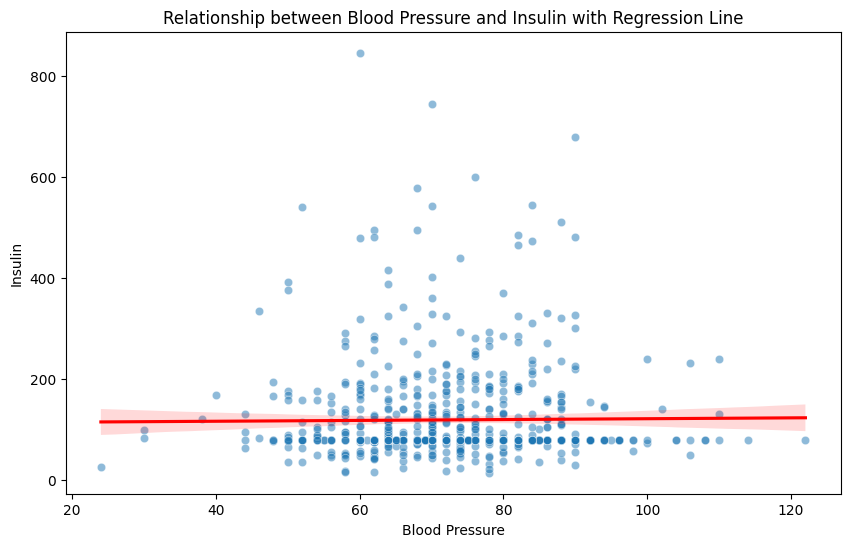

In [54]:
# BloodPressure와 Insulin의 관계를 나타내는 산점도에 선 추가
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BloodPressure', y='Insulin', data=df, alpha=0.5)

# 선형 회귀선 추가
sns.regplot(x='BloodPressure', y='Insulin', data=df, scatter=False, color='red')

plt.title('Relationship between Blood Pressure and Insulin with Regression Line')
plt.xlabel('Blood Pressure')
plt.ylabel('Insulin')
plt.show()

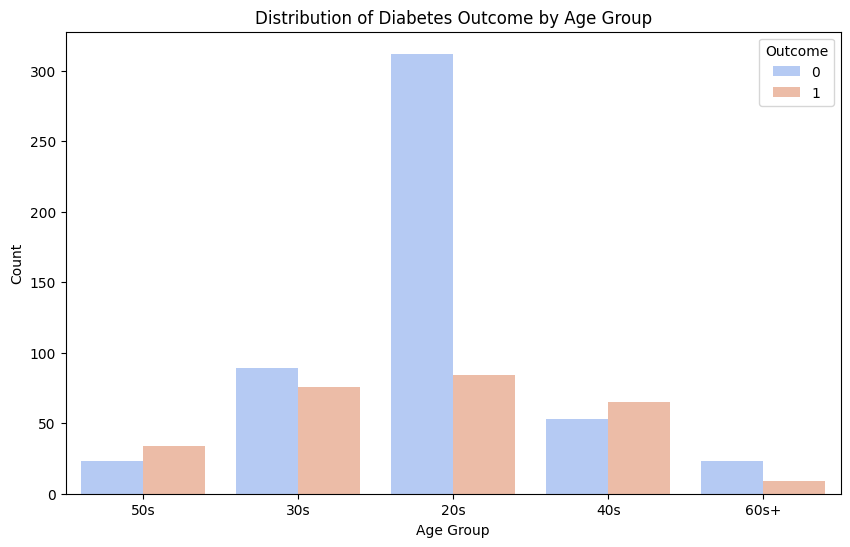

In [59]:
# Age를 연령대별로 구분하기 위한 함수 정의
def age_group(age):
    if age < 20 and age>10:
        return '10s'
    if age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    else:
        return '60s+'

# Age를 연령대별로 분류
df['Age_Group'] = df['Age'].apply(age_group)

# 연령대별 Outcome의 평균 계산
age_group_outcome_relation = df.groupby('Age_Group')['Outcome'].mean().reindex(['10s', '20s', '30s', '40s', '50s+'])

# 연령대별 Outcome 0과 1의 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='Outcome', data=df, palette='coolwarm')
plt.title('Distribution of Diabetes Outcome by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

연령대 별로 나누어서 당뇨병 유무를 확인해 본 결과 20대와 60대에서 높은 당뇨병 발병률이 나왔다.

In [60]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Group
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,50s
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,30s
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,30s
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,20s
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,30s
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0,60s+
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0,20s
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0,30s
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1,40s


In [79]:
# BMI 범주 생성 함수
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi >= 18.5 and bmi < 24.9:
        return 'Normal'
    elif bmi >= 24.9 and bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'


# 파생 변수 생성
df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

# 결과 확인
df[['BMI', 'BMI_Category', 'Insulin', 'Glucose']].head()

,BMI,BMI_Category,Insulin,Glucose
0,33.6,Obese,79.799479,148.0
1,26.6,Overweight,79.799479,85.0
2,23.3,Normal,79.799479,183.0
3,28.1,Overweight,94.000000,89.0
4,43.1,Obese,168.000000,137.0


In [80]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Group,BMI_Category,Insulin_Glucose_Ratio
0,0.639947,148.0,72.0,0.872057,79.799479,33.6,0.468492,50,1,50s,Obese,-0.718628
1,-0.844885,85.0,66.0,0.248678,79.799479,26.6,-0.365061,31,0,30s,Overweight,-0.039824
2,1.233880,183.0,64.0,-0.630654,79.799479,23.3,0.604397,32,1,30s,Normal,-0.893789
3,-0.844885,89.0,66.0,-0.374700,94.000000,28.1,-0.920763,21,0,20s,Overweight,0.159524
4,-1.141852,137.0,40.0,0.872057,168.000000,43.1,5.484909,33,1,30s,Obese,0.448447
...,...,...,...,...,...,...,...,...,...,...,...,...
763,1.827813,101.0,76.0,2.222711,180.000000,32.9,-0.908682,63,0,60s+,Obese,1.392685
764,-0.547919,122.0,70.0,0.040885,79.799479,36.8,-0.398282,27,0,20s,Obese,-0.523447
765,0.342981,121.0,72.0,-0.374700,112.000000,26.2,-0.685193,30,0,30s,Overweight,-0.062241
766,-0.844885,126.0,60.0,-0.630654,79.799479,30.1,-0.371101,47,1,40s,Obese,-0.558718


In [82]:
# Pregnancies, SkinThickness, DiabetesPedigreeFunction, Age_group, BMI_Category, Insulin_Glucose_Ratio 변수를 활용해 당뇨병 예측
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age_Group', 'BMI_Category']]
y = df['Outcome']

In [83]:
# 문자열 타입인 Age_group과 BMI_Category는 원핫인코딩을 활용해 전처리해준다.
X = pd.get_dummies(X, columns=['Age_Group', 'BMI_Category'])

In [84]:
# Pregnancies, SkinThickness, DiabetesPedigreeFunction, Insulin_Glucose_Ratio는 전부 Standardscaler를 활용해 스케일링 시켜준다
from sklearn.preprocessing import StandardScaler

# 스케일러 초기화
scaler = StandardScaler()

# 스케일링 할 변수 선택
columns_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']

# 스케일링 적용
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [85]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age_Group_20s,Age_Group_30s,Age_Group_40s,Age_Group_50s,Age_Group_60s+,BMI_Category_Normal,BMI_Category_Obese,BMI_Category_Overweight,BMI_Category_Underweight
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.468492,0,0,0,1,0,0,1,0,0
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.365061,0,1,0,0,0,0,0,1,0
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,0.604397,0,1,0,0,0,1,0,0,0
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.920763,1,0,0,0,0,0,0,1,0
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,5.484909,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.679954,0.309315,2.222711,0.659428,-0.908682,0,0,0,0,1,0,1,0,0
764,-0.547919,0.010468,-0.186224,0.040885,-0.417768,-0.398282,1,0,0,0,0,0,1,0,0
765,0.342981,-0.022409,-0.021044,-0.374700,-0.071599,-0.685193,0,1,0,0,0,0,0,1,0
766,-0.844885,0.141977,-1.012121,-0.630654,-0.417768,-0.371101,0,0,1,0,0,0,1,0,0


In [86]:
import xgboost as xgb

In [87]:
# X와 y를 활용해 분류 예측하기. 사용할 모델은 xgboost를 사용할 것이다.

# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# XGBoost 분류기 초기화 및 학습
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

pred_proba = model.predict_proba(X_test)[:,1]
clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[124  26]
 [ 36  45]]
정확도: 0.7316, 정밀도: 0.6338, 재현율: 0.555556, F1: 0.5921, AUC:0.8069


In [88]:
# 추가적으로 전처리한 데이터에 로직스틱회귀 모델을 사용했을 때 xgboost모델을 사용했을 때 보다 더 좋은 성능이 나왔다.
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:,1]
clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[133  17]
 [ 32  49]]
정확도: 0.7879, 정밀도: 0.7424, 재현율: 0.604938, F1: 0.6667, AUC:0.8539


클래스 불균형을 해소하기 위해 클래스 가중치를 계산하였다.

In [89]:
# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 클래스 가중치 계산
# 소수 클래스(1)의 샘플 수
positive_count = y_train.sum()
# 다수 클래스(0)의 샘플 수
negative_count = len(y_train) - positive_count
# scale_pos_weight 계산
scale_pos_weight = negative_count / positive_count

# XGBoost 분류기 초기화 및 학습 (클래스 가중치 설정)
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]
clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[106  45]
 [ 59  21]]
정확도: 0.5498, 정밀도: 0.3182, 재현율: 0.262500, F1: 0.2877, AUC:0.7829


클래스 가중치 계산을 했을 때 더 좋지 않은 결과가 나왔다.